# 3_Detection_Color_Example


### Librerias

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Función que muestra los detalles de la imagen. 

In [2]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

## Leer Imagen a color

In [3]:
Icv = cv.imread("manzana_roja.JPG")
howis(Icv)

size =  (425, 635, 3)
max  =  255
min  =  0


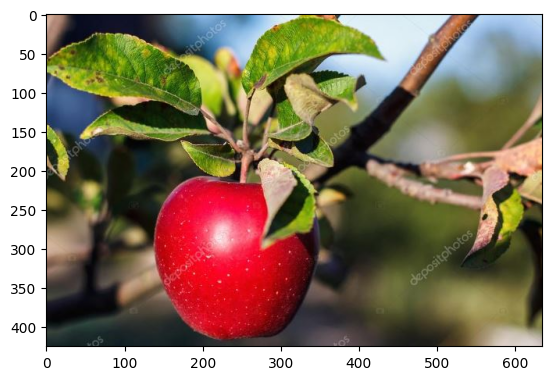

In [4]:
# Convertimos la imagen de BGR a RGB reordenando los canales.
I = Icv[:,:,[2,1,0]] 
plt.imshow(I)
plt.show()

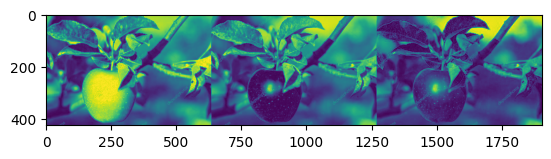

In [5]:
R = I[:,:,0]
G = I[:,:,1]
B = I[:,:,2]
RGB = np.concatenate((R,G,B),axis=1)
plt.imshow(RGB)
plt.show()

### Convertimos a blanco y negro

size =  (425, 635)
max  =  247
min  =  0


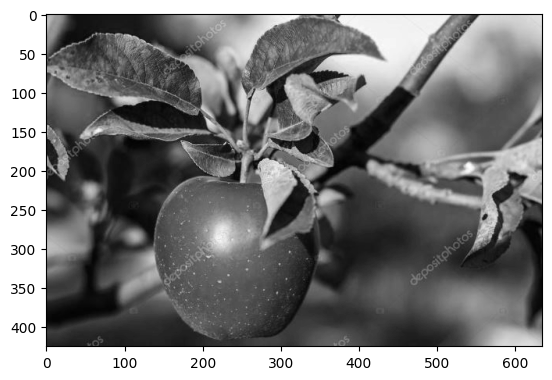

In [9]:
Rd = R.astype(float)
Gd = G.astype(float)
Bd = B.astype(float)
# weighted average
k  = (1/3,1/3,1/3)
Zd = k[0]*Rd+k[1]*Gd+k[2]*Bd
Z  = Zd.astype(int)
howis(Z)
plt.imshow(Z,cmap='gray')
plt.show()

### Histograma 

In [10]:
def imhist(X):
  (N,M) = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.plot(range(n),h[0:n])
  plt.show()

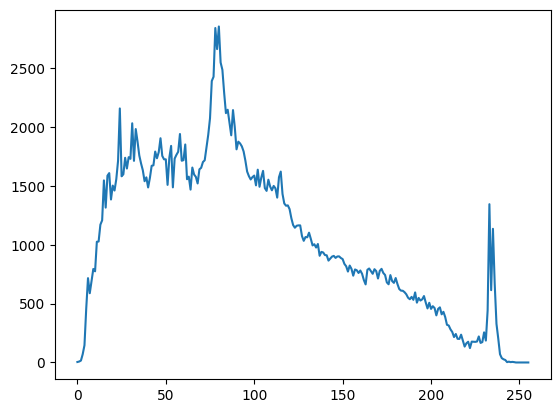

In [11]:
imhist(Z)

### Segmentación de la manzana

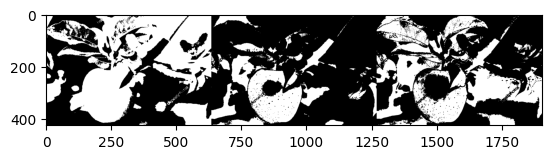

In [36]:
Sr = R>100
Sg = G<40
Sb = B<40
Srgb = np.concatenate((Sr,Sg,Sb),axis=1)
plt.imshow(Srgb,cmap='gray')
plt.show()

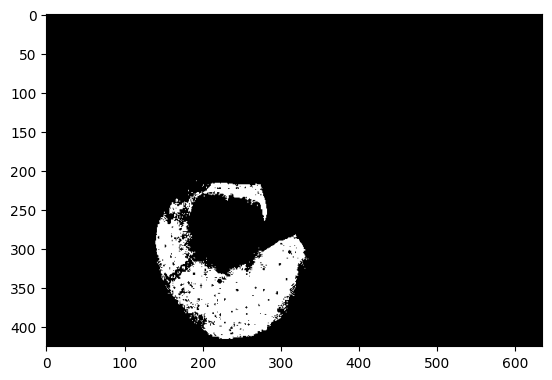

In [37]:
Srg = np.logical_and(Sr,Sg)
S   = np.logical_and(Srg,Sb)
plt.imshow(S*255,cmap='gray')
plt.show()

### Searching (imin,jmin) and (imax,jmax) in the segmented region

In [38]:
(N,M) = S.shape
imin = 1000
imax = 0
jmin = 1000
jmax = 0
for i in range(N):
  for j in range(M):
    if S[i,j]>0:
      if i<imin:
        imin = i
      if i>imax:
        imax = i
      if j<jmin:
        jmin = j
      if j>jmax:
        jmax = j

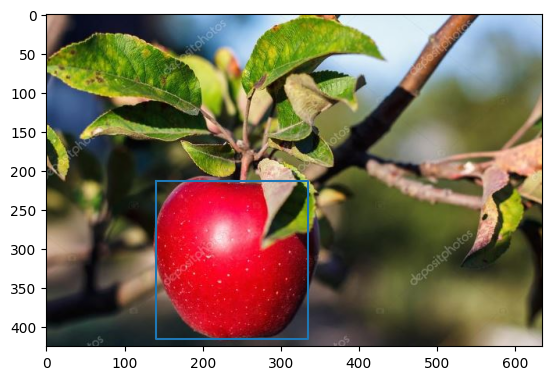

In [44]:
y = [imin,imin,imax,imax,imin]
x = [jmin,jmax,jmax,jmin,jmin]
plt.imshow(I)
plt.plot(x,y)
plt.show()
